# Логистическая регрессия 
## Данные

Однажды был проведён такой эксперимент - на 5000 участниках проверяли, как возраст и физическое здоровье влияют на потерю слуха, особенно на способность слышать высокие тона. Результаты этого эксперимента находятся в .csv-файле. У каждого участника есть возраст, оценка его физического здоровья, и результат аудио-теста (прошёл/не прошёл), проверяющего способность слышать высокие частоты. Сможем ли мы построить модель, которая будет предсказывать способность человека слышать высокие тона звука, основываясь только на его возрасте и физическом здоровье?

* Признаки

    * age - возраст участников, в годах
    * physical_score - оценка физического здоровья, полученная в результате физических тестов

* Целевая переменная (Label/Target)

    * test_result - 0 если аудио-тест не пройден, 1 если аудио-тест пройден

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('C:\\Users\\ilyak\\Desktop\\Python\\Machine Learning Python\\DATA\\hearing_test.csv')
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [5]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [6]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

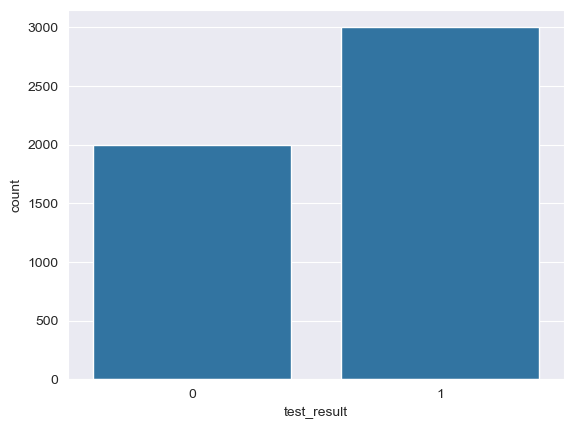

In [7]:
sns.countplot(data = df, x = 'test_result')

<Axes: xlabel='test_result', ylabel='age'>

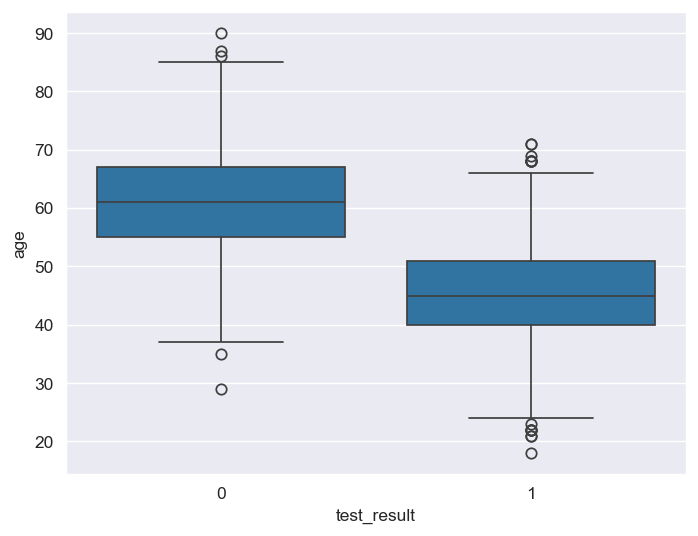

In [8]:
plt.figure(dpi = 125)
sns.boxplot(x = 'test_result', y = 'age', data = df)

<Axes: xlabel='test_result', ylabel='physical_score'>

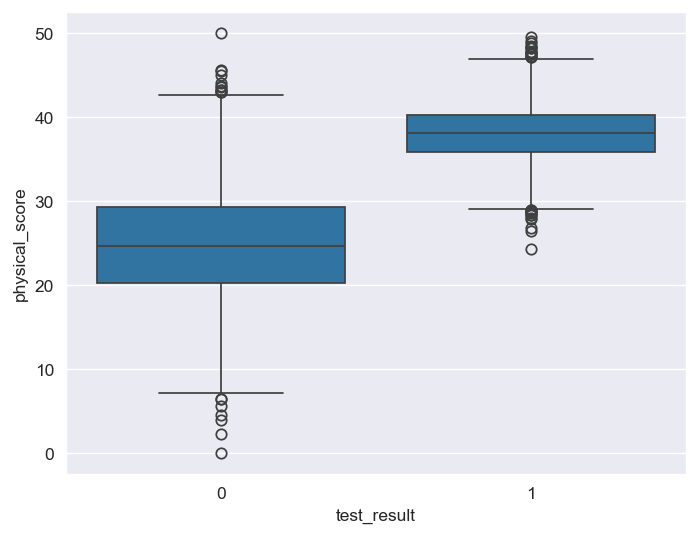

In [9]:
plt.figure(dpi = 125)
sns.boxplot(x = 'test_result', y = 'physical_score', data = df)

<Axes: xlabel='age', ylabel='physical_score'>

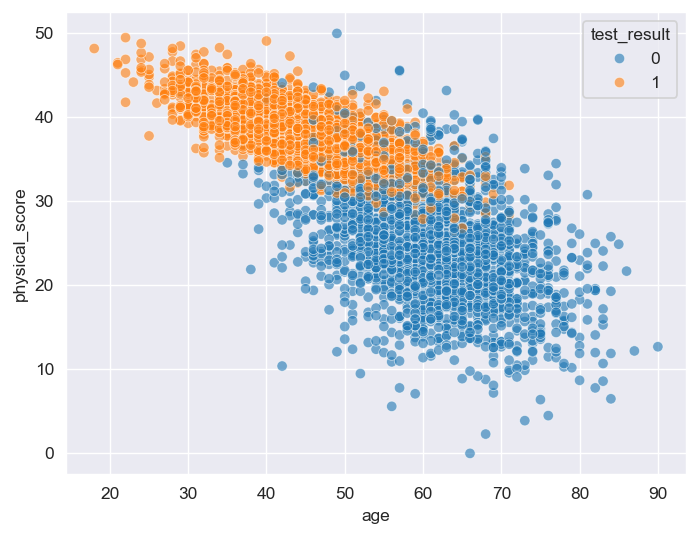

In [10]:
plt.figure(dpi = 125)
sns.scatterplot(x='age',y='physical_score',data=df, hue = 'test_result', alpha = 0.6)

Из графиков видно, что более молодые участники чаще проходят тест

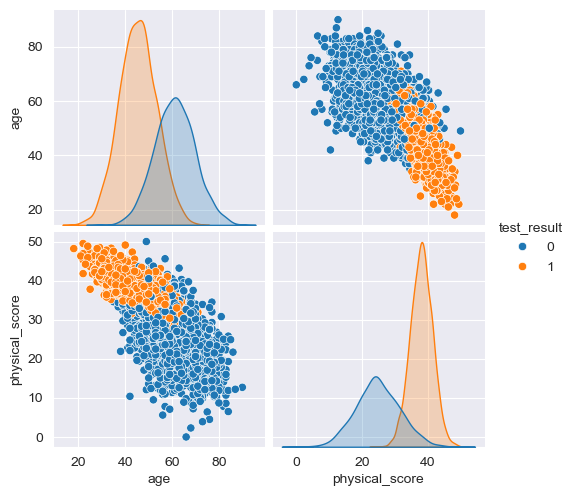

In [11]:
sns.pairplot(df, hue = 'test_result')

<Axes: >

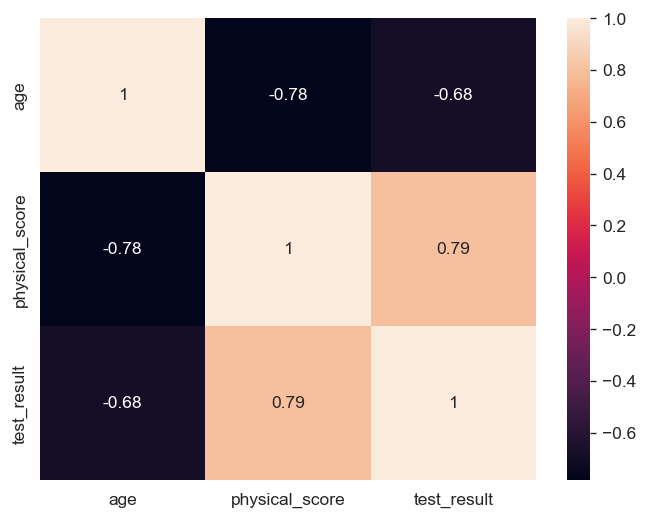

In [12]:
plt.figure(dpi = 125)
sns.heatmap(df.corr(), annot = True)

<Axes: xlabel='physical_score', ylabel='test_result'>

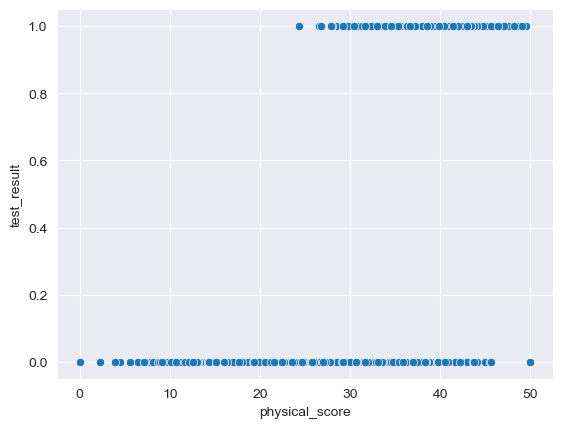

In [13]:
sns.scatterplot(x = 'physical_score', y = 'test_result', data = df)

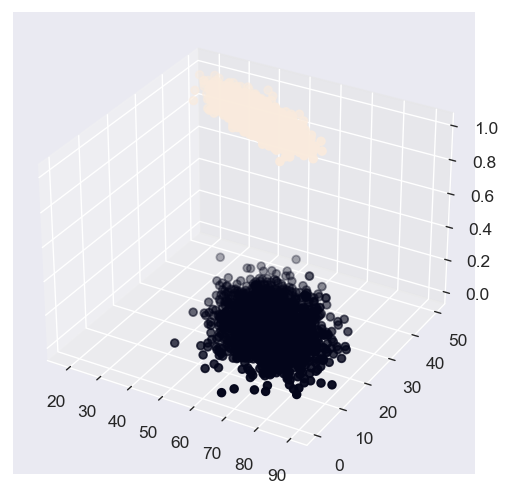

In [14]:
fig = plt.figure(dpi = 125)
ax = fig.add_subplot(projection='3d')

ax.scatter(df['age'],df['physical_score'],df['test_result'], c = df['test_result'])

Мы выполнили анализ наших данных.

Перейдем к созданию и обучению модели.

In [15]:
X = df.drop('test_result',axis = 1)
y = df['test_result']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state= 101)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [17]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [18]:
log_model.coef_

array([[-0.95017725,  3.46148946]])

In [19]:
y_prediction = log_model.predict(scaled_X_test)
y_pred_proba = log_model.predict_proba(scaled_X_test)

In [20]:
y_pred_proba

array([[2.38051656e-02, 9.76194834e-01],
       [2.68854070e-02, 9.73114593e-01],
       [9.89220033e-01, 1.07799673e-02],
       [1.90238747e-03, 9.98097613e-01],
       [9.75065740e-01, 2.49342602e-02],
       [9.89676918e-01, 1.03230822e-02],
       [7.39558885e-02, 9.26044112e-01],
       [1.70641117e-02, 9.82935888e-01],
       [9.97075399e-01, 2.92460122e-03],
       [3.30092529e-02, 9.66990747e-01],
       [8.30393770e-02, 9.16960623e-01],
       [9.90796129e-03, 9.90092039e-01],
       [7.07374696e-03, 9.92926253e-01],
       [9.34320413e-01, 6.56795867e-02],
       [1.16096233e-04, 9.99883904e-01],
       [6.58212248e-02, 9.34178775e-01],
       [9.89155494e-01, 1.08445064e-02],
       [2.79291486e-03, 9.97207085e-01],
       [5.57001286e-04, 9.99442999e-01],
       [9.96534179e-01, 3.46582117e-03],
       [8.81902000e-01, 1.18098000e-01],
       [1.30963044e-01, 8.69036956e-01],
       [5.45789772e-01, 4.54210228e-01],
       [3.43636758e-02, 9.65636324e-01],
       [3.984685

Метрики оценки модели

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
y_test


1718    1
2511    1
345     0
2521    1
54      0
       ..
4770    1
188     1
3335    0
4583    0
3208    0
Name: test_result, Length: 500, dtype: int64

In [22]:
y_pred = log_model.predict(scaled_X_test)
accuracy_score(y_test,y_pred)

0.93

In [23]:
confusion_matrix(y_test, y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

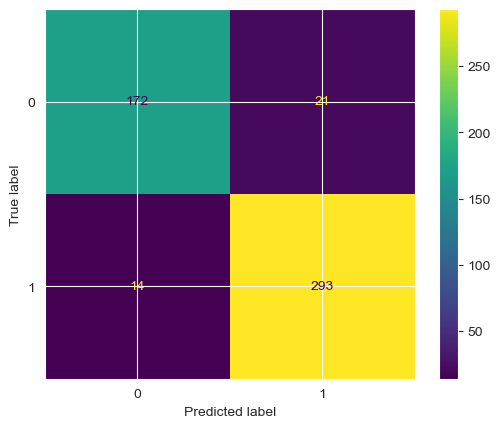

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(log_model, scaled_X_test, y_test)

In [25]:
len(y_test)

500

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [34]:
from sklearn.metrics import RocCurveDisplay

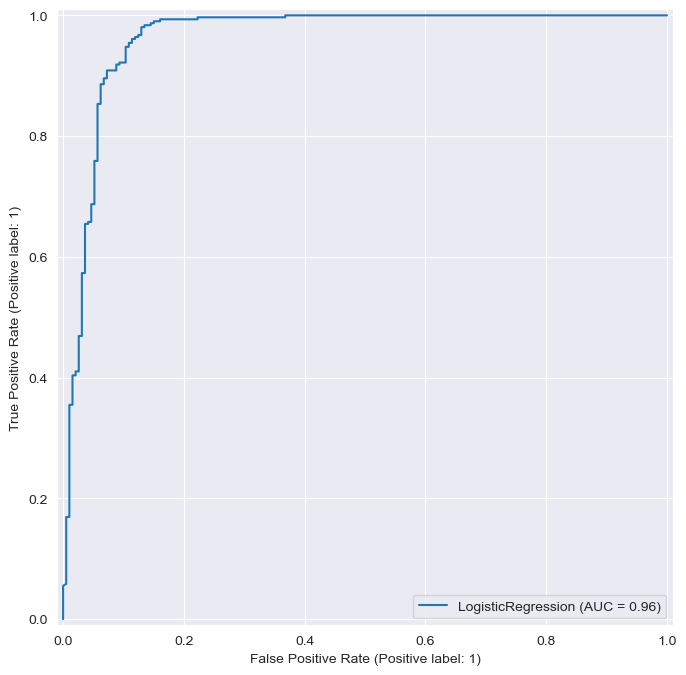

In [43]:
fig, ax = plt.subplots(figsize=(12,8),dpi=100)

RocCurveDisplay.from_estimator(log_model, scaled_X_test, y_test, ax = ax)

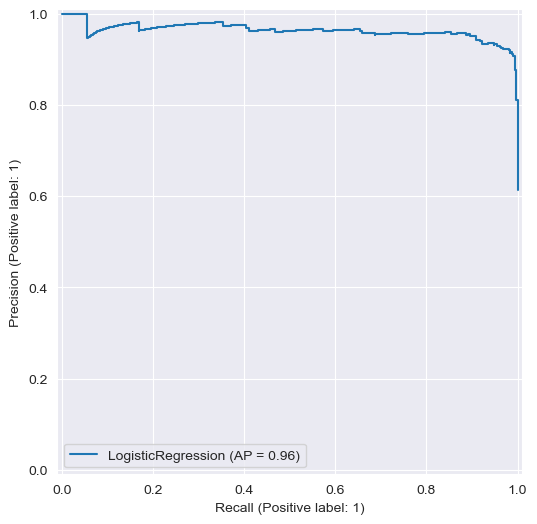

In [46]:
from sklearn.metrics import PrecisionRecallDisplay

fig, ax = plt.subplots(figsize=(6,8),dpi=100)

PrecisionRecallDisplay.from_estimator(log_model, scaled_X_test, y_test, ax = ax)

In [47]:
log_model.predict_proba(scaled_X_test)[:10]

array([[0.02380517, 0.97619483],
       [0.02688541, 0.97311459],
       [0.98922003, 0.01077997],
       [0.00190239, 0.99809761],
       [0.97506574, 0.02493426],
       [0.98967692, 0.01032308],
       [0.07395589, 0.92604411],
       [0.01706411, 0.98293589],
       [0.9970754 , 0.0029246 ],
       [0.03300925, 0.96699075]])

In [48]:
y_test[:10]

1718    1
2511    1
345     0
2521    1
54      0
2866    0
2371    0
2952    1
45      0
4653    1
Name: test_result, dtype: int64